In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/NYCTaxiFares.csv')

In [4]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [5]:
len(df)

120000

In [6]:
df['fare_amount'].describe()

,fare_amount
count,120000.000000
mean,10.040326
std,7.500134
min,2.500000
25%,5.700000
50%,7.700000
75%,11.300000
max,49.900000


In [7]:
#Haversine formula is used to find distance between two sets of GPS coordinates in df

def haversine_distance(df, lat1, long1, lat2, long2):

  r = 6371 #average radius of Earth in kilometers

  phi1 = np.radians(df[lat1])
  phi2 = np.radians(df[lat2])

  delta_phi = np.radians(df[lat2]-df[lat1])
  delta_lambda = np.radians(df[long2] - df[long1])

  a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
  d = (r*(c))

  return d

In [8]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [10]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
my_time = df['pickup_datetime'][0]

my_time.hour

8

In [14]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [15]:
df['Hour'] = df['EDTdate'].dt.hour

In [16]:
df['AmorPm'] = np.where(df['Hour']<12,"am","pm")

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AmorPm
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [18]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [19]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AmorPm,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [20]:
cat_cols = ['Hour', 'AmorPm', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count','dist_km']

In [21]:
y_col = ['fare_amount']

In [22]:
df.dtypes

,0
pickup_datetime,"datetime64[ns, UTC]"
fare_amount,float64
fare_class,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
dist_km,float64
EDTdate,"datetime64[ns, UTC]"


In [23]:
for cat in cat_cols:
  df[cat] = df[cat].astype('category')

In [24]:
df.dtypes

,0
pickup_datetime,"datetime64[ns, UTC]"
fare_amount,float64
fare_class,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
dist_km,float64
EDTdate,"datetime64[ns, UTC]"


In [25]:
df['Hour'].head()

,Hour
0,4
1,11
2,7
3,17
4,22


In [26]:
df['Weekday'].head()

,Weekday
0,Mon
1,Sat
2,Sat
3,Sun
4,Fri


In [27]:
df["AmorPm"].cat.categories

Index(['am', 'pm'], dtype='object')

In [28]:
hr = df['Hour'].cat.codes.values
ampm = df['AmorPm'].cat.codes.values
wdky = df['Weekday'].cat.codes.values

In [29]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [30]:
cats = np.stack([hr,ampm,wdky],axis=1)

In [31]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [32]:
cats = torch.tensor(cats,dtype=torch.int64)

In [33]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [34]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [35]:
conts = torch.tensor(conts, dtype=torch.float)

In [36]:
y =torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)

In [37]:
conts.shape

torch.Size([120000, 6])

In [38]:
y.shape

torch.Size([120000, 1])

In [39]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [40]:
cat_szs

[24, 2, 7]

In [41]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [42]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [43]:
catz = cats[:2]

In [44]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [45]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [46]:
embeddingz = []

for i,e in enumerate(selfembeds):
  embeddingz.append(e(catz[:,i]))

In [47]:
embeddingz

[tensor([[ 3.4410e-01,  9.9487e-01,  1.9703e+00, -1.7492e-01,  1.0162e+00,
          -1.1506e+00, -1.6000e+00, -2.5125e-03,  1.0244e+00,  6.5572e-02,
          -4.0142e-01,  7.9147e-01],
         [ 1.8340e+00, -8.6439e-02, -1.1611e+00,  2.6617e+00, -4.0671e-01,
           3.8164e-01, -3.4899e-01,  5.7417e-01, -1.5476e+00,  9.4510e-01,
           3.0810e-01, -5.1164e-01]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.1753],
         [0.1753]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.0924,  0.6741,  0.2299,  1.8015],
         [-0.1414, -0.3835, -0.7225, -0.3935]], grad_fn=<EmbeddingBackward0>)]

In [48]:
z = torch.cat(embeddingz,1)

In [49]:
z

tensor([[ 3.4410e-01,  9.9487e-01,  1.9703e+00, -1.7492e-01,  1.0162e+00,
         -1.1506e+00, -1.6000e+00, -2.5125e-03,  1.0244e+00,  6.5572e-02,
         -4.0142e-01,  7.9147e-01,  1.7529e-01, -1.0924e+00,  6.7412e-01,
          2.2987e-01,  1.8015e+00],
        [ 1.8340e+00, -8.6439e-02, -1.1611e+00,  2.6617e+00, -4.0671e-01,
          3.8164e-01, -3.4899e-01,  5.7417e-01, -1.5476e+00,  9.4510e-01,
          3.0810e-01, -5.1164e-01,  1.7529e-01, -1.4135e-01, -3.8351e-01,
         -7.2252e-01, -3.9354e-01]], grad_fn=<CatBackward0>)

In [50]:
selfembdrop = nn.Dropout(0.4)

In [51]:
z = selfembdrop(z)

In [52]:
z

tensor([[ 5.7350e-01,  1.6581e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
         -0.0000e+00, -2.6666e+00, -4.1874e-03,  0.0000e+00,  0.0000e+00,
         -6.6904e-01,  0.0000e+00,  0.0000e+00, -1.8207e+00,  0.0000e+00,
          3.8311e-01,  0.0000e+00],
        [ 3.0567e+00, -1.4406e-01, -0.0000e+00,  4.4362e+00, -6.7785e-01,
          6.3606e-01, -0.0000e+00,  0.0000e+00, -2.5794e+00,  1.5752e+00,
          0.0000e+00, -8.5273e-01,  2.9215e-01, -0.0000e+00, -6.3919e-01,
         -0.0000e+00, -0.0000e+00]], grad_fn=<MulBackward0>)

In [53]:
class TabularModel(nn.Module):
  def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
    super().__init__()
    self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
    self.emb_drop = nn.Dropout(p)
    self.bn_cont = nn.BatchNorm1d(n_cont)

    layerlist = []
    n_emb = sum([nf for ni, nf in emb_szs])
    n_in = n_emb + n_cont

    for i in layers:
      layerlist.append(nn.Linear(n_in, i))
      layerlist.append(nn.ReLU(inplace=True))
      layerlist.append(nn.BatchNorm1d(i))
      layerlist.append(nn.Dropout(p))
      n_in =i

    layerlist.append(nn.Linear(layers[-1], out_sz))

    self.layers = nn.Sequential(*layerlist)




  def forward(self, x_cat, x_cont):
    embeddings=[]

    for i , e in enumerate(self.embeds):
      embeddings.append(e(x_cat[:,i]))

    x = torch.cat(embeddings, 1)
    x = self.emb_drop(x)
    x_cont = self.bn_cont(x_cont)
    x = torch.cat([x, x_cont],1)
    x = self.layers(x)
    return x

In [54]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100],p=0.4)

In [55]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [56]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [57]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [58]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [59]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [60]:
len(cat_train)

48000

In [61]:
len(con_train)

48000

In [64]:
import time

start_time = time.time()

epochs = 100

losses = []

for i in range(epochs):
  i +=1

  y_pred = model(cat_train, con_train)
  loss = torch.sqrt(criterion(y_pred, y_train))
  losses.append(loss)

  if i% 10 ==1:
    print(f'epoch {i} loss is {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch 1 loss is 5.015625953674316
epoch 11 loss is 4.627654552459717
epoch 21 loss is 4.3414626121521
epoch 31 loss is 4.103506565093994
epoch 41 loss is 3.911069393157959
epoch 51 loss is 3.886268138885498
epoch 61 loss is 3.799053907394409
epoch 71 loss is 3.8000407218933105
epoch 81 loss is 3.724323272705078
epoch 91 loss is 3.717477560043335
Training took 0.8365318298339843 minutes


In [67]:
num_losses = [loss.detach().numpy() for loss in losses]
print(num_losses)

[array(5.015626, dtype=float32), array(4.9760375, dtype=float32), array(4.933872, dtype=float32), array(4.8927774, dtype=float32), array(4.857224, dtype=float32), array(4.826214, dtype=float32), array(4.81006, dtype=float32), array(4.7679935, dtype=float32), array(4.6782656, dtype=float32), array(4.6880536, dtype=float32), array(4.6276546, dtype=float32), array(4.614534, dtype=float32), array(4.560877, dtype=float32), array(4.503315, dtype=float32), array(4.521648, dtype=float32), array(4.481544, dtype=float32), array(4.425381, dtype=float32), array(4.396278, dtype=float32), array(4.391339, dtype=float32), array(4.3344154, dtype=float32), array(4.3414626, dtype=float32), array(4.2823744, dtype=float32), array(4.2579317, dtype=float32), array(4.221021, dtype=float32), array(4.2406516, dtype=float32), array(4.226631, dtype=float32), array(4.180857, dtype=float32), array(4.1742234, dtype=float32), array(4.137665, dtype=float32), array(4.1034265, dtype=float32), array(4.1035066, dtype=floa

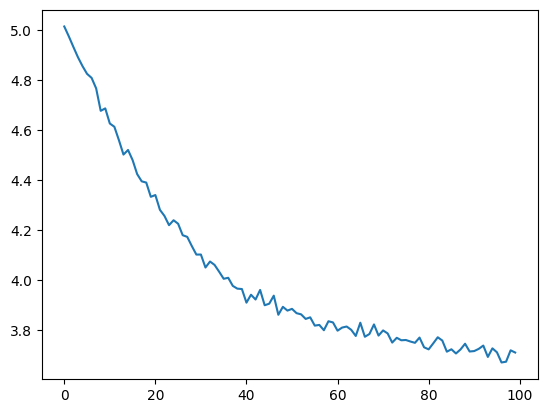

In [68]:
plt.plot(range(epochs), num_losses)

In [69]:
with torch.no_grad():
  y_val = model(cat_test, con_test)

  loss = torch.sqrt(criterion(y_val, y_test))

In [70]:
loss

tensor(3.6452)

In [76]:
for i in range(10):
  diff = np.abs(y_val[i].item()- y_test[i].item())
  print(f'{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} DIFFERENCE: {diff:8.2f}')

0.) PREDICTED:     4.63 TRUE:     2.90 DIFFERENCE:     1.73
1.) PREDICTED:    13.65 TRUE:     5.70 DIFFERENCE:     7.95
2.) PREDICTED:     7.41 TRUE:     7.70 DIFFERENCE:     0.29
3.) PREDICTED:    13.77 TRUE:    12.50 DIFFERENCE:     1.27
4.) PREDICTED:     7.23 TRUE:     4.10 DIFFERENCE:     3.13
5.) PREDICTED:     5.87 TRUE:     5.30 DIFFERENCE:     0.57
6.) PREDICTED:     1.31 TRUE:     3.70 DIFFERENCE:     2.39
7.) PREDICTED:    18.65 TRUE:    14.50 DIFFERENCE:     4.15
8.) PREDICTED:     4.95 TRUE:     5.70 DIFFERENCE:     0.75
9.) PREDICTED:    13.73 TRUE:    10.10 DIFFERENCE:     3.63


In [78]:
torch.save(model.state_dict(), 'TaxiModel.pt')